In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import scipy.io
import pandas as pd
import glob
from os import listdir
import pathlib
from fastai.vision import *
from fastai.metrics import error_rate

# Read in Data
I already downloaded the data from https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html
Things to note.
* 102 flower categories
* images are in jpg folder
* labels are in a matlab file
* labels are numbers not text (found the website that shows what the numbers mean but none of the files show that which is slightly annoying)
* the 2008 paper got a ~84% accuracy

Loading Labels

In [3]:
mat = scipy.io.loadmat('imagelabels.mat')

In [4]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009',
 '__version__': '1.0',
 '__globals__': [],
 'labels': array([[77, 77, 77, 77, ..., 62, 62, 62, 62]], dtype=uint8)}

In [5]:
mat['labels'].shape

(1, 8189)

In [6]:
len(mat['labels'][0])

8189

Loading paths for filenames

In [7]:
imageFlNames = listdir("./jpg/")

In [8]:
len(imageFlNames)

8189

In [9]:
path_img = pathlib.Path('jpg')
path_img

WindowsPath('jpg')

In [10]:
fnames = get_image_files(path_img)
fnames[:5]

[WindowsPath('jpg/image_00001.jpg'),
 WindowsPath('jpg/image_00002.jpg'),
 WindowsPath('jpg/image_00003.jpg'),
 WindowsPath('jpg/image_00004.jpg'),
 WindowsPath('jpg/image_00005.jpg')]

Combining everything into a DataFrame to use to create the ImageDataBunch

In [11]:
imageLabels = pd.DataFrame({"filenames": fnames, "lables": mat['labels'][0]})
imageLabels.head()

,filenames,lables
0,jpg\image_00001.jpg,77
1,jpg\image_00002.jpg,77
2,jpg\image_00003.jpg,77
3,jpg\image_00004.jpg,77
4,jpg\image_00005.jpg,77


### Setup Learner
Create the ImageDataBunch from a DataFrame

In [12]:
bs = 16

In [13]:
#help(ImageDataBunch)

In [14]:
data = ImageDataBunch.from_df('.', imageLabels, ds_tfms=get_transforms(), size=224, bs=bs
                              ).normalize(imagenet_stats)

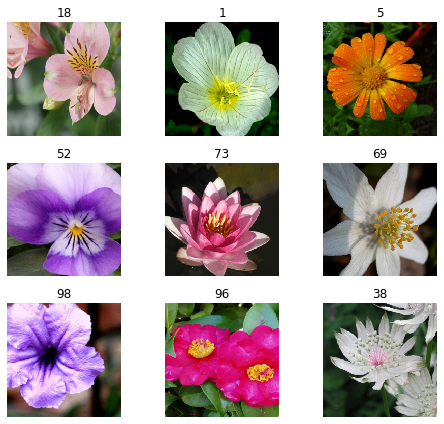

In [15]:
data.show_batch(rows=3, figsize=(7,6))

In [16]:
print(data.classes)
len(data.classes),data.c

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]


(102, 102)

Download and fit the resnet34 model

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\tacorn/.cache\torch\checkpoints\resnet34-333f7ec4.pth


In [1]:
#learn.model

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.443507,0.589216,0.155773,04:49
1,0.741443,0.361613,0.103849,04:34
2,0.519818,0.222460,0.059866,04:33
3,0.344299,0.199300,0.058644,04:30


Save the fitted model

In [20]:
learn.save('stage-1')

Look into what the model is interpretting wrong

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

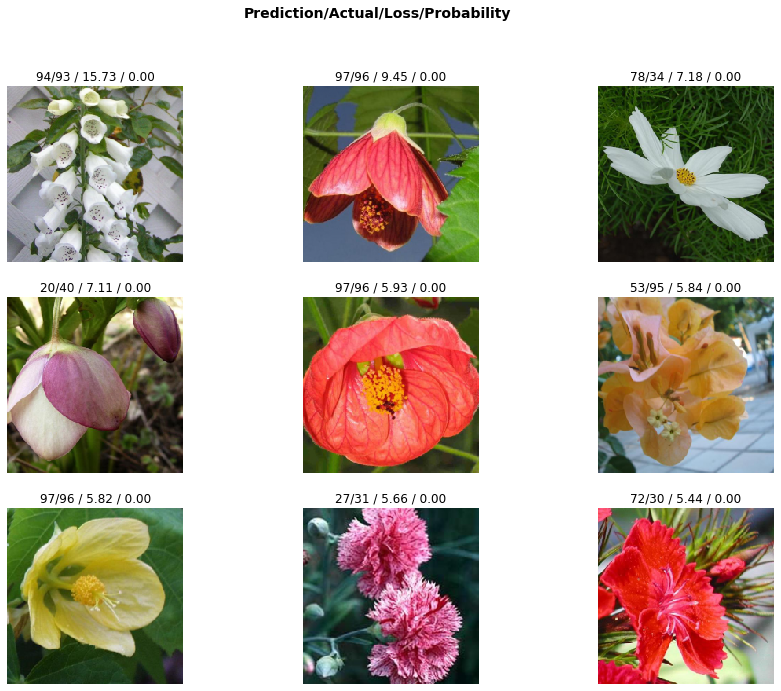

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

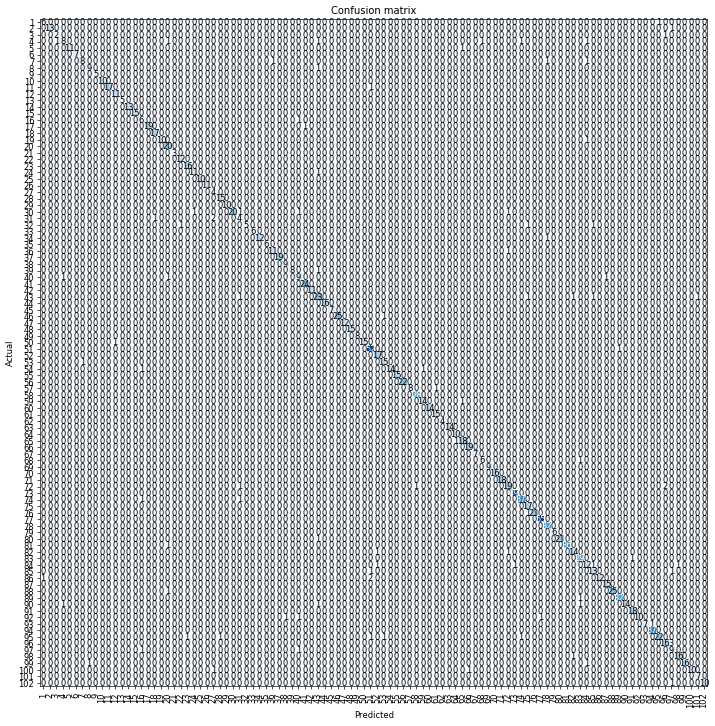

In [23]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[(96, 97, 3), (31, 27, 2), (72, 96, 2), (86, 51, 2)]

In [26]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


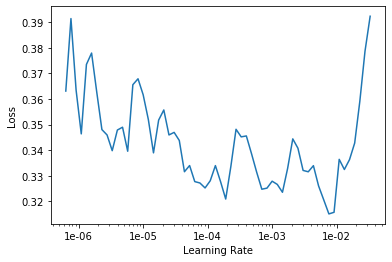

In [27]:
learn.recorder.plot()